# UKKO - Transformer model for tabular longitudonal data 

Author: Eric Fey (eric.fey@hus.fi)
First version: 2025-03-01

Usage:
1. Install hatchling 
  ```bash
  pip install hatchling
  ```
2. Install ukko package in development (editable) mode:
  ```bash
  pip install -e .
  ```
3. Go :smiley:

In [4]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///users/ericfey1/github/ukko
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... one
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ukko (pyproject.toml) ... done
  Created wheel for ukko: filename=ukko-0.1.0-py3-none-any.whl size=1088 sha256=ecf792c0a5f0ba587d1f251fb19a246789501725ec70f3b0c387eb4910a892fa
  Stored in directory: /tmp/ericfey1/26990614/pip-ephem-wheel-cache-im54xr4s/wheels/d6/05/1b/87b6398b4c9fcb6c3490d41e36b033368cd35528f738f0e67e
Successfully built ukko
  Attempting uninstall: ukko
    Found existing installation: ukko 0.1.0
    Uninstalling ukko-0.1.0:
      Successfully uninstalled ukko-0.1.0

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --

In [7]:
# attention model with residual connection
import torch
import torch.nn as nn
import math
import ukko 

In [11]:
# Test ukko installatin and model
%run ./tests/tests_core.py
test_model();

ImportError: cannot import name 'DualAttentionModel' from 'ukko.core' (/users/ericfey1/github/ukko/src/ukko/core.py)

NameError: name 'test_model' is not defined

### Uninstall re-install

In case there is trouble

In [9]:
!pip uninstall --yes ukko 

Found existing installation: ukko 0.1.0
Uninstalling ukko-0.1.0:
  Successfully uninstalled ukko-0.1.0


In [10]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///users/ericfey1/github/ukko
  Installing build dependencies ... one
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... one
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ukko (pyproject.toml) ... done
  Created wheel for ukko: filename=ukko-0.1.0-py3-none-any.whl size=1088 sha256=ecf792c0a5f0ba587d1f251fb19a246789501725ec70f3b0c387eb4910a892fa
  Stored in directory: /tmp/ericfey1/26990614/pip-ephem-wheel-cache-zn7o1jjp/wheels/d6/05/1b/87b6398b4c9fcb6c3490d41e36b033368cd35528f738f0e67e
Successfully built ukko

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


# Test data: sine wave

/users/ericfey1/github/ukko/src/ukko/data.py:92: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  self.data = torch.FloatTensor(data)  # [n_samples, n_features, sequence_length + prediction_length]


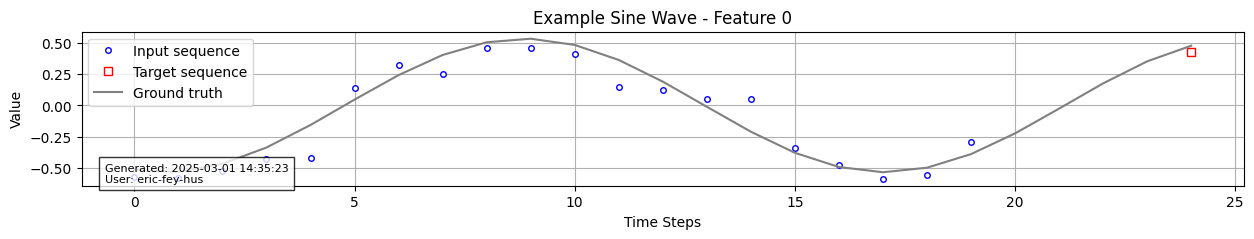

In [12]:
import numpy as np
import ukko 
from ukko.data import SineWaveDataset
import importlib
importlib.reload(ukko.data)
importlib.reload(ukko.core)

batch_size = 32
n_samples = 10
n_features = 3
sequence_length = 20
prediction_length = 5

mydataset = ukko.data.SineWaveDataset(n_samples, n_features, sequence_length, prediction_length)
ukko.data.plot_example_dataset(mydataset, sample_idx=0, feature_idx=0)


In [28]:
type(mydataset.data)
mydataset.data.shape

torch.Size([10, 3, 25])

In [93]:
phase_array = np.random.uniform(0, 2 * np.pi, n_features)
phase_array[0]

0.12933619211510794

# Test model using sinewave data

## Generate test dataset

[1.41777934 0.70924079 0.93821697 1.04954276 1.18410498 1.67776394
 0.79951067 1.27135166 1.38862185 0.56967562]
[1.41777934 0.70924079 0.93821697 1.04954276 1.18410498 1.67776394
 0.79951067 1.27135166 1.38862185 0.56967562]


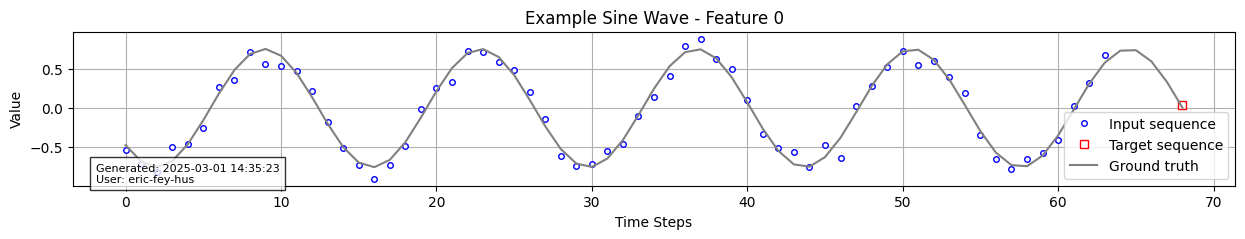

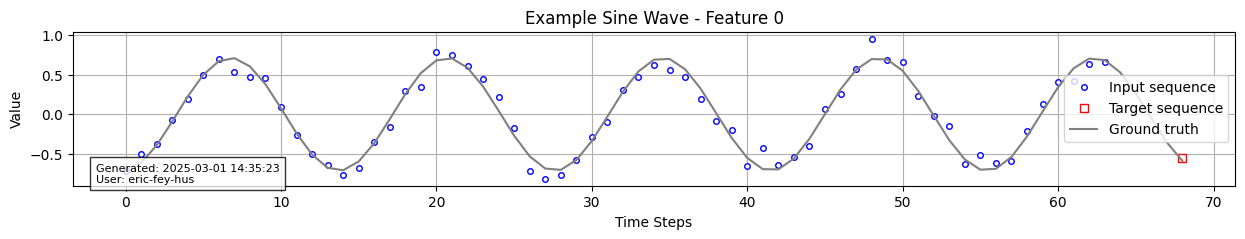

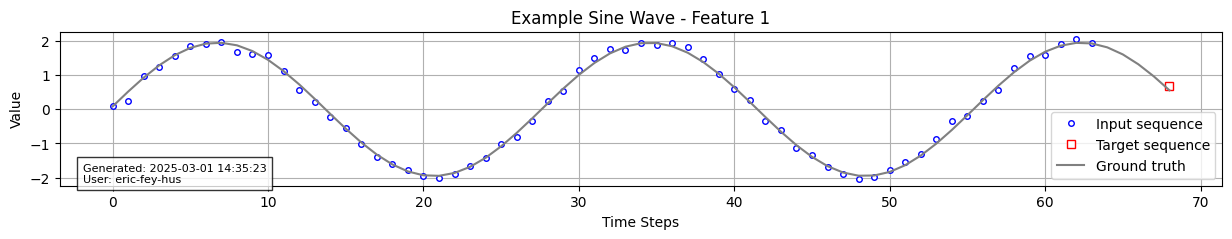

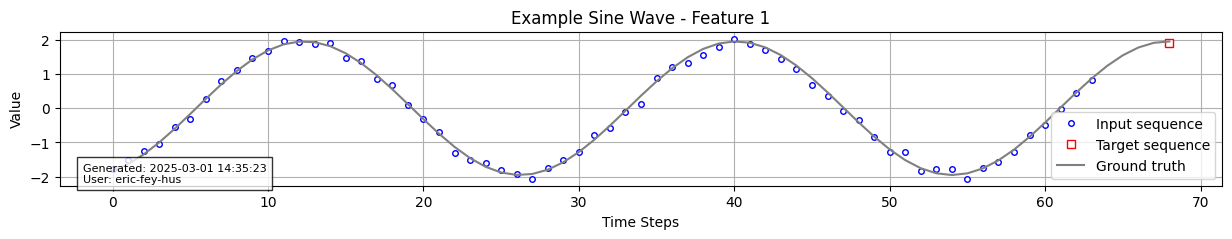

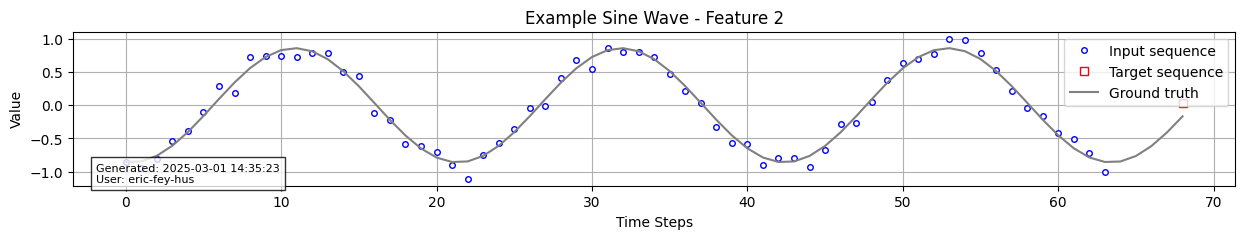

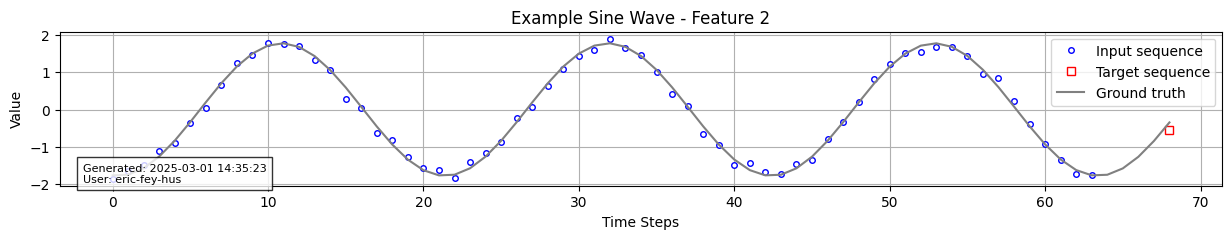

In [19]:
# Test model using sine data

import torch, ukko, importlib
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from datetime import datetime

importlib.reload(ukko.data)
importlib.reload(ukko.core)
importlib.reload(ukko.test)

# Parameters
batch_size = 32
n_samples = 1000
n_features = 10
sequence_length = 64
prediction_length = 5

# Create datasets
#train_dataset = ukko.data.SineWaveDataset(n_samples, n_features, sequence_length, prediction_length)
#val_dataset = ukko.data.SineWaveDataset(n_samples//5, n_features, sequence_length, prediction_length, seed=43)
#test_dataset = ukko.data.SineWaveDataset(n_samples//5, n_features, sequence_length, prediction_length, seed=44)
train_dataset, val_dataset, test_dataset = ukko.test.create_datasets(
    n_samples = n_samples, 
    n_features = n_features, 
    sequence_length = sequence_length, 
    prediction_length = 5,
    base_freq=0.05,
)
print(train_dataset.freq_array)
print(val_dataset.freq_array)

# Create data loaders
#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=batch_size)
#test_loader = DataLoader(test_dataset, batch_size=batch_size)
train_loader, val_loader, test_loader = ukko.test.create_dataloaders(
    datasets=(train_dataset, val_dataset, test_dataset), 
    batch_size=batch_size
)

# Plot example
ukko.data.plot_example_dataset(train_dataset, sample_idx=0)
ukko.data.plot_example_dataset(train_dataset, sample_idx=1)
ukko.data.plot_example_dataset(train_dataset, feature_idx=1, sample_idx=0)
ukko.data.plot_example_dataset(train_dataset, feature_idx=1, sample_idx=1)
ukko.data.plot_example_dataset(train_dataset, feature_idx=2, sample_idx=3)
ukko.data.plot_example_dataset(train_dataset, feature_idx=2, sample_idx=4)


## Initialize and train model



In [28]:
importlib.reload(ukko.core)

# class DualAttentionModel(nn.Module):
#     def __init__(self, base_model, d_model):
#         super().__init__()
#         self.base_model = base_model
#         self.final_layer = nn.Linear(d_model, 1)
    
#     def forward(self, x):
#         x = self.base_model(x)
#         print(x)
#         x = self.final_layer(x).squeeze(-1)
#         return x

# # Usage
# coremodel = ukko.core.DualAttentionModule(
#     n_features=n_features,
#     time_steps=sequence_length,
#     d_model=128,
#     n_heads=8,
#     dropout=0.1
# )
# model = DualAttentionModel(coremodel, d_model=128)

<module 'ukko.core' from '/users/ericfey1/github/ukko/src/ukko/core.py'>

Epoch   1/20, Train Loss: 2.1706, Val Loss: 0.7867
Epoch   2/20, Train Loss: 0.7751, Val Loss: 0.7627
Epoch   3/20, Train Loss: 0.7707, Val Loss: 0.7630
Epoch   4/20, Train Loss: 0.7720, Val Loss: 0.7544
Epoch   5/20, Train Loss: 0.6584, Val Loss: 0.5190
Epoch   6/20, Train Loss: 0.1953, Val Loss: 0.1120
Epoch   7/20, Train Loss: 0.0891, Val Loss: 0.0567
Epoch   8/20, Train Loss: 0.0485, Val Loss: 0.0322
Epoch   9/20, Train Loss: 0.0360, Val Loss: 0.0212
Epoch  10/20, Train Loss: 0.0296, Val Loss: 0.0309
Epoch  11/20, Train Loss: 0.0283, Val Loss: 0.0269
Epoch  12/20, Train Loss: 0.0262, Val Loss: 0.0200
Epoch  13/20, Train Loss: 0.0233, Val Loss: 0.0188
Epoch  14/20, Train Loss: 0.0229, Val Loss: 0.0217
Epoch  15/20, Train Loss: 0.0227, Val Loss: 0.0206
Epoch  16/20, Train Loss: 0.0224, Val Loss: 0.0138
Epoch  17/20, Train Loss: 0.0210, Val Loss: 0.0179
Epoch  18/20, Train Loss: 0.0205, Val Loss: 0.0204
Epoch  19/20, Train Loss: 0.0201, Val Loss: 0.0142
Epoch  20/20, Train Loss: 0.018

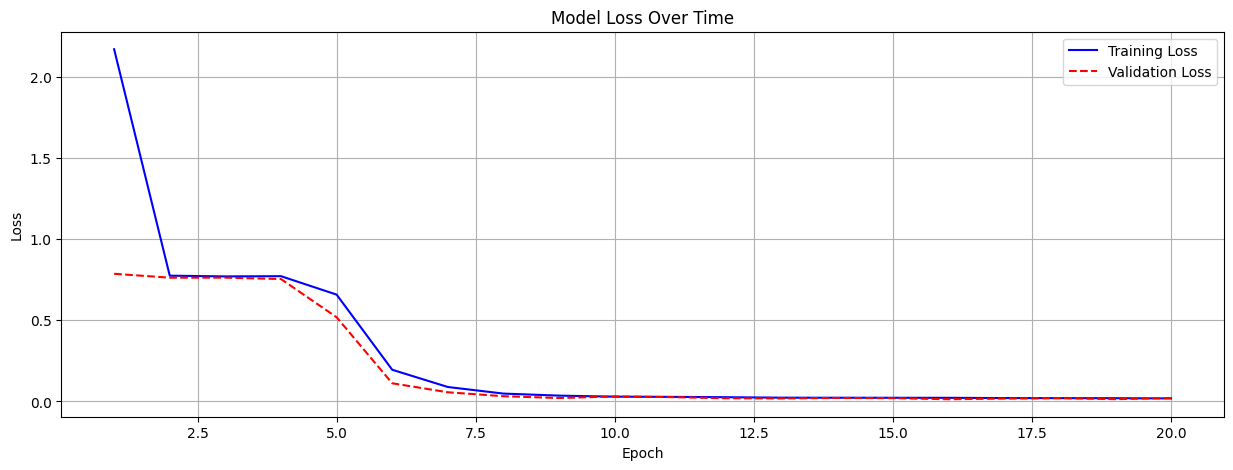

In [30]:
import torch.nn as nn

# Create dictionary to store metrics
history = {
    'train_loss': [],
    'val_loss': [],
    'train_acc': [],
    'val_acc': []
}

# Initialize model
model = ukko.core.DualAttentionModel(
    n_features=n_features,
    time_steps=sequence_length,
    d_model=128,
    n_heads=8,
    dropout=0.1
)

def train_sine_model(model, train_loader, val_loader, epochs=100, lr=0.001, device='cuda', verbose=True):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')

    for epoch in range(epochs):
        # Training
        model.train()
        train_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()
            output, _, _ = model(x)
            #loss = criterion(output, y[:, :, 0])  # Compare with first time step of prediction
            loss = criterion(output, y)  # y is only one timepoint 5 or 4 steps ahead

            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                output, _, _ = model(x)
                #val_loss += criterion(output, y[:, :, 0]).item()
                val_loss += criterion(output, y).item()

        train_loss /= len(train_loader)
        val_loss /= len(val_loader)

        # Log training progress:
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        
        if verbose:
            print(f"Epoch {epoch+1:3.0f}/{epochs}, Train Loss: {train_loss:1.4f}, Val Loss: {val_loss:1.4f}")
            #print(f"Train Loss: {train_loss:1.4f}")
            #print(f"Val Loss: {val_loss:1.4f}")

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), 'best_sine_model.pt')

# Train the model
train_sine_model(model, train_loader, val_loader, epochs=20)

# Visualize training
ukko.core.plot_training_curves(
    train_losses = history['train_loss'], 
    val_losses   = history['val_loss'],
    figsize=(15, 5),
)

## Visualize results

/tmp/ericfey1/26990614/ipykernel_2913751/3648388870.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_sine_model.pt'))


Loaded best model weights successfully!
Test Set Metrics:
Average MSE: 0.0139
Average MAE: 0.0935
RMSE: 0.1181


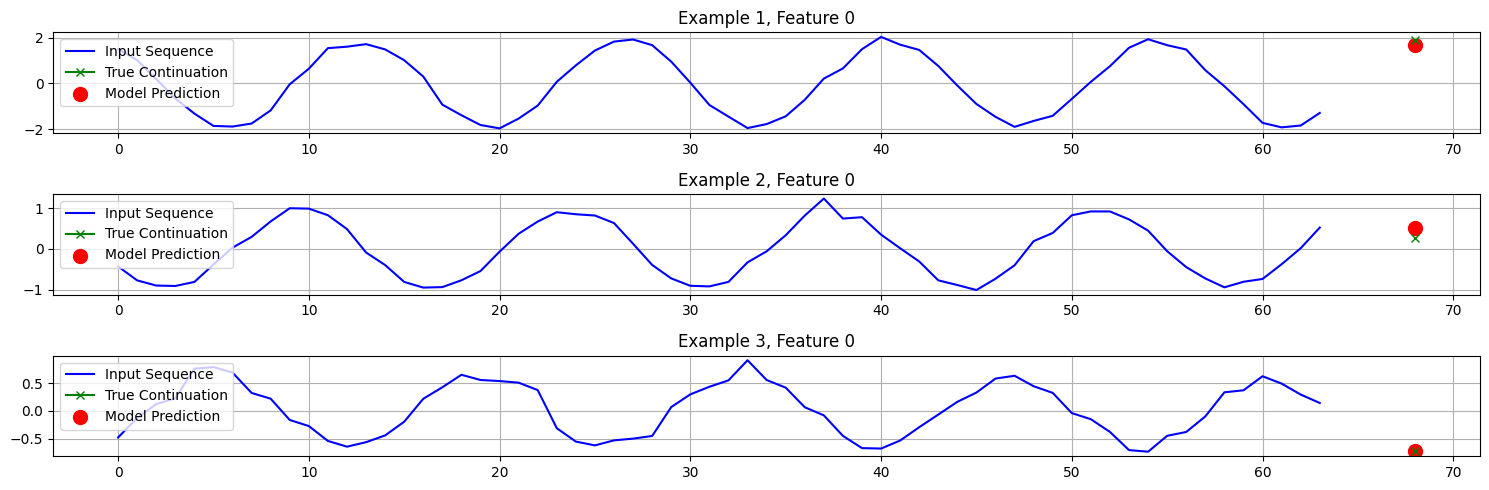

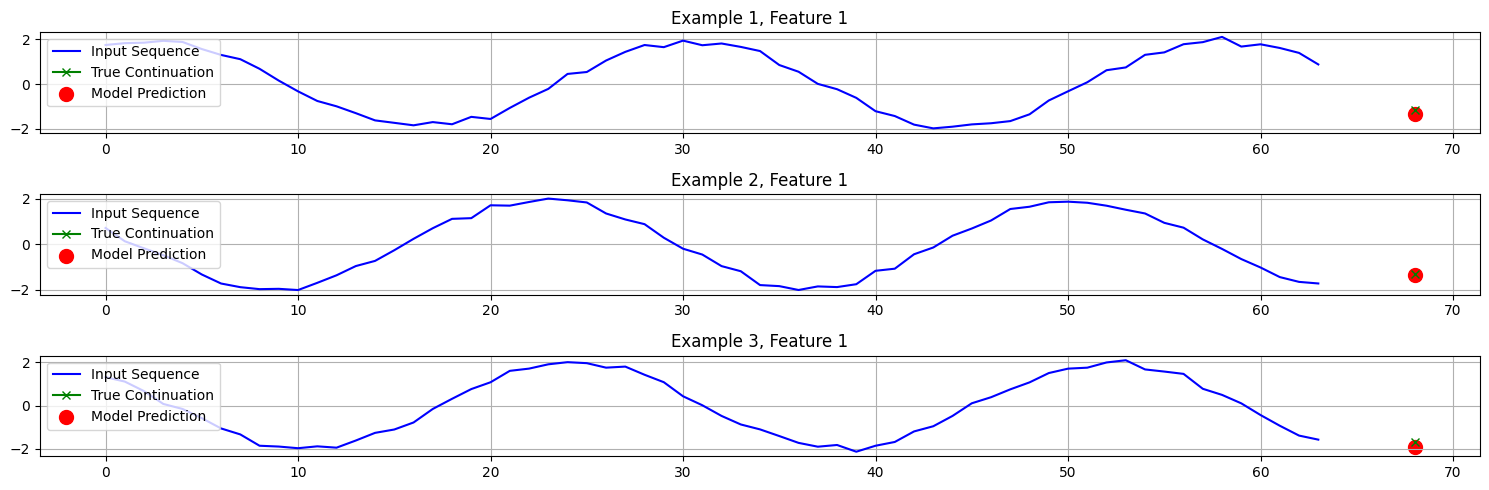

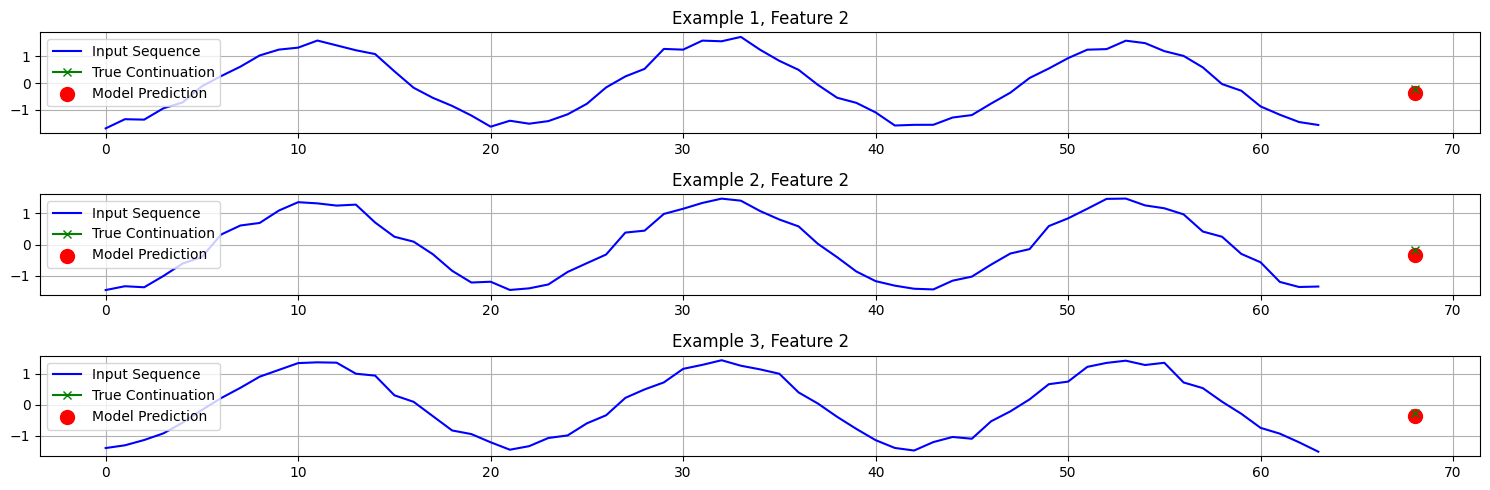

Data: (32, 10)
Predictions: (32, 10)


/users/ericfey1/github/ukko/src/ukko/core.py:274: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(predictions[:,col], y[:,col],


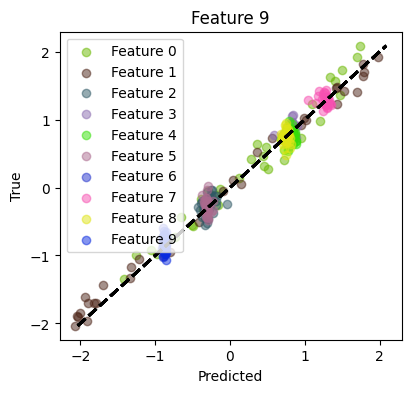

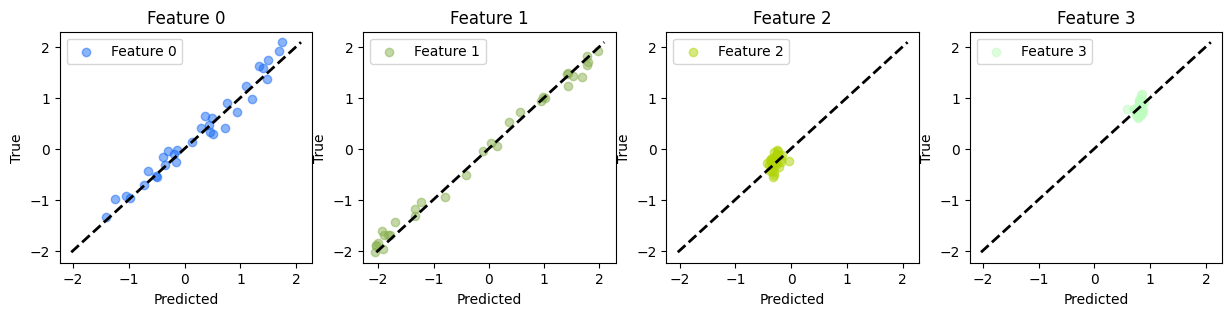

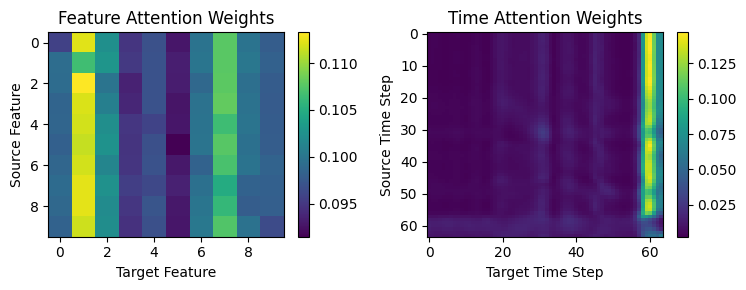

In [31]:
# Visualize results

import torch
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

importlib.reload(ukko.data)
importlib.reload(ukko.core)
importlib.reload(ukko.test)

def evaluate_model(model, test_loader, device='cuda'):
    model.eval()
    criterion = torch.nn.MSELoss()
    total_mse = 0
    total_mae = 0
    num_batches = 0

    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            predictions, _, _ = model(x)

            # Calculate MSE and MAE
            #mse = criterion(predictions, y[:, :, 0])
            #mae = torch.abs(predictions - y[:, :, 0]).mean()
            mse = criterion(predictions, y)
            mae = torch.abs(predictions - y).mean()

            total_mse += mse.item()
            total_mae += mae.item()
            num_batches += 1

    avg_mse = total_mse / num_batches
    avg_mae = total_mae / num_batches

    print(f"Test Set Metrics:")
    print(f"Average MSE: {avg_mse:.4f}")
    print(f"Average MAE: {avg_mae:.4f}")
    print(f"RMSE: {np.sqrt(avg_mse):.4f}")

    return avg_mse, avg_mae

def main():

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    if not model:
        print("No model present. Initialize model first. Be carfull to use the same model config.")
        return

    # Load best model weights
    try:
        model.load_state_dict(torch.load('best_sine_model.pt'))
        print("Loaded best model weights successfully!")
    except:
        print("No saved model found. Please train the model first.")
        return

    # Evaluate model
    mse, mae = evaluate_model(model, test_loader, device)

    # Visualize results
    ukko.core.visualize_predictions(model, test_loader, device)

    # Save a timestamp of when these results were generated
    timestamp = "2025-03-01 10:01:16"  # Using the provided timestamp
    user = "eric-fey-hus"

    # Save results to a file
    with open('model_results.txt', 'w') as f:
        f.write(f"Results generated on: {timestamp}\n")
        f.write(f"Generated by user: {user}\n")
        f.write(f"Model Performance Metrics:\n")
        f.write(f"MSE: {mse:.4f}\n")
        f.write(f"MAE: {mae:.4f}\n")
        f.write(f"RMSE: {np.sqrt(mse):.4f}\n")

#if __name__ == "__main__":
main()